In [4]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [5]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

#### Plotting Data

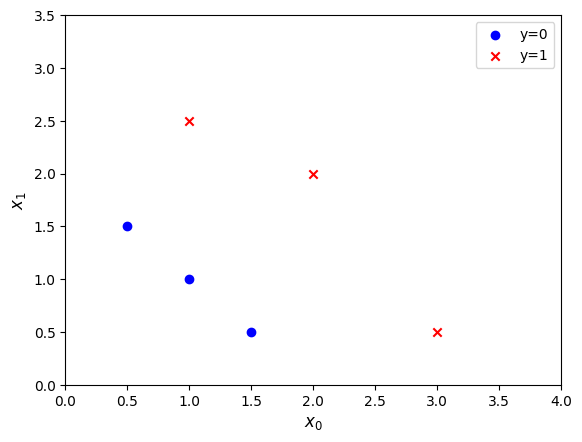

In [6]:
# Split by class label
pos = y_train == 1
neg = y_train == 0

# Plot
plt.scatter(X_train[neg, 0], X_train[neg, 1], c='blue', marker='o', label='y=0')
plt.scatter(X_train[pos, 0], X_train[pos, 1], c='red', marker='x', label='y=1')

# Labels and legend
plt.axis([0, 4, 0, 3.5])
plt.ylabel('$x_1$', fontsize=12)
plt.xlabel('$x_0$', fontsize=12)
plt.legend()
plt.show()

#### Prediction Function

In [7]:
def predicted_value(X, w, b):
    return (np.dot(X,w) + b)

#### Implementing sigmoid function

In [8]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

#### Implementing loss function

In [9]:
def loss_function(X, w, b, y):
    f_wb_i = sigmoid_function(predicted_value(X,w,b))
    loss = -y * np.log(f_wb_i) - (1-y) * np.log(1 - f_wb_i)
    return loss

#### Cost

In [10]:
def cost(X, w, b, y):
    #predicting values
    z = np.dot(X, w) + b
    #apply sigmoid function to all predicted values
    f_wb = 1 / (1 + np.exp(-z))
    #calculate all losses
    loss = -y * np.log(f_wb) - (1-y) * np.log(1-f_wb)
    #total loss is the average of all losses
    total_loss = np.mean(loss)
    return total_loss

In [11]:
w_tmp = np.array([1,1])
b_tmp = -3
print(cost(X_train, w_tmp, b_tmp, y_train))

0.36686678640551745


#### Compute Gradient

In [27]:
def compute_gradient(X, w, b, y):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = 1 / (1 + np.exp(-z))
    d_dw = np.dot((f_wb-y), X) / m
    d_db = np.mean(f_wb - y)

    return d_dw, d_db

#### Gradient Descent

In [32]:
def gradient_descent(X, w_init, b_init, y, alpha, num_iter):
    #storing history of cost
    J_history = []
    #deep copy
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iter):
        #calculate gradient using the parameters
        d_dw, d_db = compute_gradient(X, w, b, y)

        #updating parameters
        w -= alpha * d_dw
        b -= alpha * d_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost(X, w, b, y) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [33]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, w_tmp, b_tmp, y_train, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930084   
Iteration 3000: Cost 0.05705327279402528   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884565   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569289   
Iteration 9000: Cost 0.019030137124109094   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


#### Plotting

NameError: name 'plt_prob' is not defined

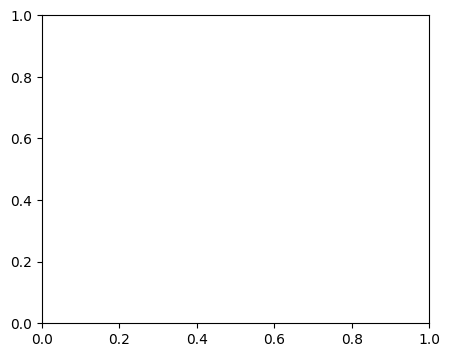